In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from src.parsers import mimic, hirid
from src.modeling import discovery, plots, querier
from src.utils import constants

In [4]:
import sys
import win32com.client
import os
import pandas as pd

def setup_io_config(root_path):
    """
    Input - Output config. Add dataset paths
    :root_path -> Repo path which contains 'data' and 'res' folders
    """

    # MIMIC
    is_shortcut = True if "data.lnk" in os.listdir(root_path) else False 
    
    if (is_shortcut):
        path_shortcut =  os.path.join(root_path, "data.lnk")
        shell = win32com.client.Dispatch("WScript.Shell")
        mimic_data = shell.CreateShortCut(path_shortcut).Targetpath
    else:
        mimic_data = os.path.join(f"{root_path}", "data") 
    mimic_path = os.path.join(f"{root_path}", "results")

    # HIRID
    hirid_data = f'{root_path}/data/hirid-a-high-time-resolution-icu-dataset-1.1.1/raw_stage/'
    hirid_path = f'{root_path}/data/hirid-a-high-time-resolution-icu-dataset-1.1.1'
    
    return mimic_data, mimic_path, hirid_data, hirid_path

def setup_stratification_config():
    gender="MF"
    age_b=40
    age_a=80 
    ethnicity="WHITE" 
    lab_mapping= constants.LAB_MAPPING
    before_windows = [(0,12)]
    after_windows = [(0,12)]
    return gender, age_a, age_b, ethnicity, lab_mapping, before_windows, after_windows

In [5]:
# IO Config
root_path ="C:\\Users\\danco\\My Drive\\Master\\Datasets\\MIMIC iii"
#root_path = "/Users/pavan/Library/CloudStorage/GoogleDrive-f20190038@hyderabad.bits-pilani.ac.in/My Drive/TAU/Code/DrugLab"
data, res, raw_path, res_path = setup_io_config(root_path=root_path)

# Stratification Config
gender, age_a, age_b, ethnicity, lab_mapping, before_windows, after_windows = setup_stratification_config()

In [ ]:
# MIMIC
mimic_parser = mimic.MIMICParser(data=data, res=res, gender=gender, age_b=age_b, age_a=age_a, 
                                 ethnicity=ethnicity, load="AUTOMATIC_MAPPING_MIMIC")
m_med1, m_med2, m_labs = mimic_parser.parse(use_pairs=False, load_from_raw=False, load_raw_chartevents=False)

## Querier
mimic_data_querier = querier.DatasetQuerier(
    data = data,
    res = res,
    t_labs=m_labs, 
    t_med1=m_med1, 
    t_med2=m_med2,
    gender=gender, 
    age_b=age_b, 
    age_a=age_a, 
    ethnicity=ethnicity, 
    lab_mapping=lab_mapping
)
# query pairs for all medication and lab tests
m_final_lab_med_data = mimic_data_querier.generate_med_lab_data(before_windows, after_windows)

Loading med data...
Loaded med data.
Load 1st and 2nd medication data...


C:\Users\danco\My Drive\Master\Projects\DrugLab\src\parsers\mimic.py:102: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  med_k = pd.read_csv(med_vect_data_path) if not load_from_raw and os.path.exists(med_vect_data_path) else self.generate_med_k_vect(med_preprocessed=med_preprocessed, k=k)


Loaded 1st and 2nd medication data.
Load Lab data...


C:\Users\danco\My Drive\Master\Projects\DrugLab\src\parsers\mimic.py:225: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  labs = pd.read_csv(os.path.join(self.data, constants.MIMIC_III_PREPROCESSED_PATH, constants.MIMIC_III_PREPROCESSED_LABDATA))


Loaded Lab data.


In [14]:
b_w = [(0,6), (6,12)]
a_w = [(0,4), (4,8), (8,12)]
med_lab_pair_1 = mimic_data_querier.query('Insulin - Regular', 'Glucose', b_w, a_w)

C:\Users\danco\My Drive\Master\Projects\DrugLab\src\modeling\querier.py:184: FutureWarning: Passing 'suffixes' which cause duplicate columns {'after_trends_(4, 8)_x', 'after_trends_(0, 4)_x', 'after_mean_(8, 12)_x', 'before_mean_(6, 12)_x', 'after_trends_(8, 12)_x', 'after_mean_(4, 8)_x', 'before_mean_(0, 6)_x', 'before_trends_(6, 12)_x', 'after_trends_(6, 12)_x', 'after_mean_(0, 4)_x', 'before_trends_(0, 6)_x'} in the result is deprecated and will raise a MergeError in a future version.
  col_vals[i] = pd.merge(col_vals[i-1], col_vals[i], how="outer", on=list(med1_filtered.columns)+["LAB_ITEMID"])
C:\Users\danco\My Drive\Master\Projects\DrugLab\src\modeling\querier.py:184: FutureWarning: Passing 'suffixes' which cause duplicate columns {'after_trends_(4, 8)_x', 'after_trends_(0, 4)_x', 'after_mean_(8, 12)_x', 'before_mean_(6, 12)_x', 'after_trends_(8, 12)_x', 'after_mean_(4, 8)_x', 'before_mean_(0, 6)_x', 'before_trends_(6, 12)_x', 'after_trends_(6, 12)_x', 'after_mean_(0, 4)_x', 'bef

In [19]:
b_w = [(0,12)]
a_w = [(0,12)]
x = mimic_data_querier.query('Insulin - Regular', 'Glucose', b_w, a_w)

C:\Users\danco\My Drive\Master\Projects\DrugLab\src\modeling\querier.py:184: FutureWarning: Passing 'suffixes' which cause duplicate columns {'before_mean_(0, 12)_x', 'after_trends_(0, 12)_x', 'after_mean_(0, 12)_x', 'before_trends_(0, 12)_x'} in the result is deprecated and will raise a MergeError in a future version.
  col_vals[i] = pd.merge(col_vals[i-1], col_vals[i], how="outer", on=list(med1_filtered.columns)+["LAB_ITEMID"])
C:\Users\danco\My Drive\Master\Projects\DrugLab\src\modeling\querier.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final["LAB_NAME"] = final["LAB_ITEMID"]


In [7]:
#inputevents_mv = pd.read_csv(os.path.join(data, constants.MIMIC_III_RAW_PATH, "INPUTEVENTS_MV.csv.gz"))
#med_data = pd.read_csv(os.path.join(self.data, constants.MIMIC_III_RAW_PATH, "D_ITEMS.csv.gz"))
#x[0]['OldITEMID']
#inputevents_mv.columns
#inputevents_mv[inputevents_mv.ITEMID == 223258]['SUBJECT_ID']

#test_path = os.path.join(f"{root_path}", "12-48_mimic_test.csv")
#train_path = os.path.join(f"{root_path}", "12-48_mimic_train.csv")

#df_train = pd.read_csv(train_path)
#df_test = pd.read_csv(test_path)

#df_data = pd.concat([df_test,df_train])


<Axes: >

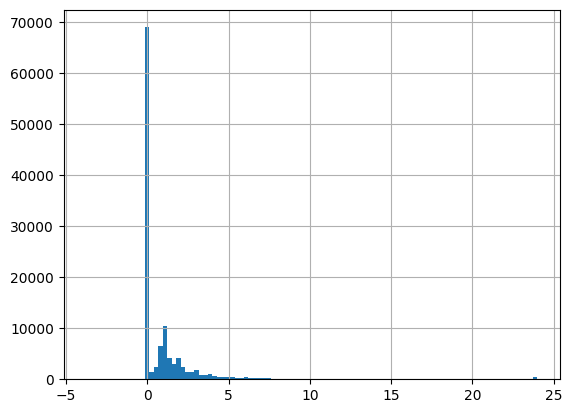

In [114]:
import numpy as np
max_time_diff = 24
time_diffrence = ((pd.to_datetime(y.ENDTIME) - pd.to_datetime(y.STARTTIME))/ np.timedelta64(1, 's'))/(60*60) # hours
#(time_diffrence < max_time_diff).value_counts()
time_diffrence[time_diffrence < max_time_diff].hist(bins=100)
#time_diffrence.hist(bins=100)

In [6]:
med_dict = {"Glucose": ['Dextrose 50%','Vancomycin','OR Cell Saver Intake','Insulin - Regular','PO Intake']}

vital_signs = ['Heart Rate', 'Respiratory rate','Oxygen saturation', 'Systolic blood pressure', 'Diastolic blood pressure',
               'Temperature']
labs_bmp = ['Glucose','Potassium','Sodium','Chloride', 'Creatinine', 'Blood urea nitrogen', 'Bicarbonate', 'Calcium',
            'Albumin', 'Lactate dehydrogenase']
labs_cbc = ['Hematocrit','Hemoglobin', 'Platelets', 'White blood cell count', 'Red blood cell count',
            'Mean corpuscular volume', 'Lymphocytes', 'Neutrophils']
            
med_dict = {"Glucose": [('Dextrose 50%',1),('Vancomycin',1),('OR Cell Saver Intake',1),('Insulin - Regular',-1),('PO Intake',1)]}

lab_name = 'Glucose'
df_med = pd.DataFrame(med_dict[lab_name],columns=['med_label','effect'])

#pull drug itemid from d_items
df_d_items = pd.read_csv(os.path.join(data, constants.MIMIC_III_RAW_PATH, "D_ITEMS.csv.gz"))
med_item_id = df_d_items[(df_d_items.LABEL.isin(df_med.med_label)) & (df_d_items.DBSOURCE == 'metavision')][['LABEL','ITEMID']]

# add item id
df_med = df_med.merge(med_item_id, left_on='med_label', right_on='LABEL').drop(['LABEL'], axis=1)

#load input_events
inputevents_mv = pd.read_csv(os.path.join(data, constants.MIMIC_III_RAW_PATH, "INPUTEVENTS_MV.csv.gz"))

#pull relevant medications to lab_name
df_inputevents = inputevents_mv[inputevents_mv.ITEMID.isin(df_med.ITEMID)]

# round start time to hour
df_inputevents['STARTTIME_rounded'] = pd.to_datetime(df_inputevents['STARTTIME'], utc=True).dt.round(freq='H')

#Take mean amount or drug per hour
df_inputevents= df_inputevents.groupby(['ITEMID','SUBJECT_ID','STARTTIME_rounded'])['AMOUNT'].mean().reset_index()




C:\Users\danco\AppData\Local\Temp\ipykernel_2976\3969251510.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputevents['STARTTIME_rounded'] = pd.to_datetime(df_inputevents['STARTTIME'], utc=True).dt.round(freq='H')


,gender,ethnicity,age,Alanine aminotransferase,Albumin,Albumin ascites,Albumin pleural,Albumin urine,Alkaline phosphate,Anion gap,...,Weight,White blood cell count,White blood cell count urine,pH,pH urine,Dextrose 50%,Vancomycin,OR Cell Saver Intake,Insulin - Regular,PO Intake
0,0,0,72.127711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
1,0,0,72.127711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
2,0,0,72.127711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
3,0,0,72.127711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
4,0,0,72.127711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759599,1,0,68.061471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
1759600,1,0,68.061471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
1759601,1,0,68.061471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
1759602,1,0,68.061471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False


In [109]:
data_path =  os.path.join(f"{root_path}", "MIMIC longitudinal hourly.csv")

df_data = pd.read_csv(data_path)
df_data['charttime'] = pd.to_datetime(df_data['charttime'], utc=True)

#temp_item_id = 223258
for temp_item_id in df_med.ITEMID:
    temp_df_inputevents = df_inputevents[df_inputevents.ITEMID == temp_item_id].reset_index()
    df_data = pd.merge(df_data, temp_df_inputevents,  how='left', left_on=['subject_id','charttime'], right_on = ['SUBJECT_ID','STARTTIME_rounded'])
    df_data = df_data.drop(['SUBJECT_ID','STARTTIME_rounded','index','ITEMID'], axis=1)
    med_name = df_med[df_med.ITEMID == temp_item_id]['med_label'].iloc[0]
    df_data = df_data.rename(columns={"AMOUNT": med_name})
    
#convert amount to True/False
df_data[list(df_med.med_label)] = ~df_data[list(df_med.med_label)].isna()

In [90]:
def mask_values(df, columns, mask_rate=0.3, seed=0, logfile=None):
    """ Given DF, mask (np.nan) each columns (available) values, by mask_rate percent. 
        The masking is done on avaiable values only.  """
    N_before = df.isna().sum().sum()
    masked_df = df.copy()
    mask_index = {}

    for col in columns:
        sampled_rows = masked_df[col].dropna().sample(frac=mask_rate, random_state=seed).index  # ensure random seed
        masked_df.loc[sampled_rows, col] = pd.np.nan  # mask avaiable data
        mask_index[col] = sampled_rows

    N_after = masked_df.isnull().sum().sum()
    if logfile:
        write_log(logfile, f"mask_values: {N_after - N_before} values from {len(columns)} variables were masked")

    return masked_df, mask_index
#df_data
#df_data[['subject_id','charttime',lab_name]+list(df_med.med_label)][df_data.subject_id == 29156]
#xxx= new_df[['subject_id','charttime',lab_name]+list(df_med.med_label)]


In [111]:
df = df_data.drop(['subject_id','DISCHTIME','DOD','charttime', 'death', 'leave', 'discharge'],axis=1)

print(df['Glucose'].isna().value_counts())
x = mask_values(df, ['Glucose'], mask_rate=0.1, seed=0, logfile=None)

new_df = x[0]
print(x[0]['Glucose'].isna().value_counts())

True     1286157
False     473447
Name: Glucose, dtype: int64


C:\Users\danco\AppData\Local\Temp\ipykernel_2976\2502380686.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  masked_df.loc[sampled_rows, col] = pd.np.nan  # mask avaiable data


True     1333502
False     426102
Name: Glucose, dtype: int64


In [112]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(new_df)
IterativeImputer(random_state=0)
#X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
imp_mean.transform(new_df)

C:\Users\danco\AppData\Roaming\Python\Python38\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array([[ 0.        ,  0.        , 72.12771053, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 72.12771053, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 72.12771053, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.        , 68.06147074, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        , 68.06147074, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        , 68.06147074, ...,  0.        ,
         0.        ,  0.        ]])

In [116]:
med_dict = {"Glucose": ['Dextrose 50%','Vancomycin','OR Cell Saver Intake','Insulin - Regular','PO Intake'}

                        vital_signs = ['Heart Rate', 'Respiratory rate','Oxygen saturation', 'Systolic blood pressure', 'Diastolic blood pressure',
               'Temperature']
labs_bmp = ['Glucose','Potassium','Sodium','Chloride', 'Creatinine', 'Blood urea nitrogen', 'Bicarbonate', 'Calcium',
            'Albumin', 'Lactate dehydrogenase']
labs_cbc = ['Hematocrit','Hemoglobin', 'Platelets', 'White blood cell count', 'Red blood cell count',
            'Mean corpuscular volume', 'Lymphocytes', 'Neutrophils']
            

#df_train[vital_signs+labs_bmp+labs_cbc]
list(df_train.columns)


# Add: 'Monocytes'
# Missing: RDW, pCO2, pO2, PT
# Removed: D-Dimer, Fibronogen

#glucose sammples
x = df_train[['subject_id','charttime','Glucose']]

#insulin adminstrations
y = inputevents_mv[inputevents_mv.ITEMID == 223258]

y['STARTTIME_rounded'] = pd.to_datetime(y['STARTTIME']).dt.round(freq='H')

yy = y[['SUBJECT_ID','STARTTIME_rounded','AMOUNT']]
#duration of administrations

yy['STARTTIME_rounded'] = pd.to_datetime(yy['STARTTIME_rounded'], utc=True)
#take mean amount
yy= yy.groupby(['SUBJECT_ID','STARTTIME_rounded'])['AMOUNT'].mean().reset_index()
x['charttime'] = pd.to_datetime(x['charttime'], utc=True)

    
new_df = pd.merge(x, yy,  how='left', left_on=['subject_id','charttime'], right_on = ['SUBJECT_ID','STARTTIME_rounded'])

new_df


C:\Users\danco\AppData\Local\Temp\ipykernel_5088\3639622600.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['STARTTIME_rounded'] = pd.to_datetime(y['STARTTIME']).dt.round(freq='H')
C:\Users\danco\AppData\Local\Temp\ipykernel_5088\3639622600.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yy['STARTTIME_rounded'] = pd.to_datetime(yy['STARTTIME_rounded'], utc=True)
C:\Users\danco\AppData\Local\Temp\ipykernel_5088\3639622600.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,subject_id,charttime,Glucose,SUBJECT_ID,STARTTIME_rounded,AMOUNT
0,5675,2116-11-10 16:00:00+00:00,97.0,NaN,NaT,NaN
1,5675,2116-11-10 20:00:00+00:00,97.0,NaN,NaT,NaN
2,5675,2116-11-10 23:00:00+00:00,97.0,NaN,NaT,NaN
3,5675,2116-11-11 00:00:00+00:00,97.0,NaN,NaT,NaN
4,5675,2116-11-11 01:00:00+00:00,97.0,NaN,NaT,NaN
...,...,...,...,...,...,...
1409682,48346,2144-02-07 21:00:00+00:00,93.0,NaN,NaT,NaN
1409683,48346,2144-02-07 22:00:00+00:00,93.0,NaN,NaT,NaN
1409684,48346,2144-02-08 17:00:00+00:00,93.0,NaN,NaT,NaN
1409685,48346,2144-02-08 18:00:00+00:00,93.0,NaN,NaT,NaN


In [119]:
#set(x.subject_id).intersection(set(yy.SUBJECT_ID))
new_df[new_df.subject_id == 99712]

,subject_id,charttime,Glucose,SUBJECT_ID,STARTTIME_rounded,AMOUNT
419970,99712,2159-03-30 08:00:00+00:00,162.0,NaN,NaT,NaN
419971,99712,2159-03-30 09:00:00+00:00,178.0,NaN,NaT,NaN
419972,99712,2159-03-30 11:00:00+00:00,186.0,NaN,NaT,NaN
419973,99712,2159-03-30 12:00:00+00:00,186.0,NaN,NaT,NaN
419974,99712,2159-03-30 13:00:00+00:00,186.0,NaN,NaT,NaN
419975,99712,2159-03-30 14:00:00+00:00,186.0,NaN,NaT,NaN
419976,99712,2159-03-30 15:00:00+00:00,186.0,NaN,NaT,NaN
419977,99712,2159-03-30 16:00:00+00:00,187.0,NaN,NaT,NaN
419978,99712,2159-03-30 17:00:00+00:00,187.0,NaN,NaT,NaN
419979,99712,2159-03-30 18:00:00+00:00,187.0,NaN,NaT,NaN


In [18]:
analyzer = discovery.ClinicalDiscoveryAnalysis(m_final_lab_med_data)
pvals_med_lab = analyzer.analyze(before_windows, after_windows)
sig_med_lab = analyzer.generate_significant(pvals_med_lab.dropna(subset=["TTest Paired"]))

AttributeError: 'tuple' object has no attribute 'groupby'

In [8]:
#med_preprocessed_path = os.path.join(data, constants.MIMIC_III_PREPROCESSED_PATH, constants.MIMIC_III_MED_PREPROCESSED_FILE_PATH)
#x = pd.read_csv(med_preprocessed_path)
# x.columns
res_paths = [os.path.join(data, "mimiciii", "1.4","preprocessed", "CHARTEVENTS", f"chartevents_with_mimic_extract_{count}.csv.gz") for count in range(6)]
res_paths
#labevents = pd.read_csv(os.path.join(data, constants.MIMIC_III_PREPROCESSED_PATH, constants.MIMIC_III_LABEVENT_PREPROCESSED))

['G:\\.shortcut-targets-by-id\\1-ARL03M0t8yGB3xiy_k1lhmQBHJWToFK\\data\\mimiciii\\1.4\\preprocessed\\CHARTEVENTS\\chartevents_with_mimic_extract_0.csv.gz',
 'G:\\.shortcut-targets-by-id\\1-ARL03M0t8yGB3xiy_k1lhmQBHJWToFK\\data\\mimiciii\\1.4\\preprocessed\\CHARTEVENTS\\chartevents_with_mimic_extract_1.csv.gz',
 'G:\\.shortcut-targets-by-id\\1-ARL03M0t8yGB3xiy_k1lhmQBHJWToFK\\data\\mimiciii\\1.4\\preprocessed\\CHARTEVENTS\\chartevents_with_mimic_extract_2.csv.gz',
 'G:\\.shortcut-targets-by-id\\1-ARL03M0t8yGB3xiy_k1lhmQBHJWToFK\\data\\mimiciii\\1.4\\preprocessed\\CHARTEVENTS\\chartevents_with_mimic_extract_3.csv.gz',
 'G:\\.shortcut-targets-by-id\\1-ARL03M0t8yGB3xiy_k1lhmQBHJWToFK\\data\\mimiciii\\1.4\\preprocessed\\CHARTEVENTS\\chartevents_with_mimic_extract_4.csv.gz',
 'G:\\.shortcut-targets-by-id\\1-ARL03M0t8yGB3xiy_k1lhmQBHJWToFK\\data\\mimiciii\\1.4\\preprocessed\\CHARTEVENTS\\chartevents_with_mimic_extract_5.csv.gz']

In [ ]:
# MIMIC
mimic_parser = mimic.MIMICParser(data=data, res=res, gender=gender, age_b=age_b, age_a=age_a, ethnicity=ethnicity, load="AUTOMATIC_MAPPING_MIMIC")
m_med1, m_med2, m_labs = mimic_parser.parse(use_pairs=False, load_from_raw=False, load_raw_chartevents=False)

## Querier
mimic_data_querier = querier.DatasetQuerier(
    data = data,
    res = res,
    t_labs=m_labs, 
    t_med1=m_med1, 
    t_med2=m_med2,
    gender=gender, 
    age_b=age_b, 
    age_a=age_a, 
    ethnicity=ethnicity, 
    lab_mapping=lab_mapping
)
# query pairs for all medication and lab tests
m_final_lab_med_data = mimic_data_querier.generate_med_lab_data(before_windows, after_windows)
# Querying pairs for a single medication and lab test
b_w = [(0,6), (6,12)]
a_w = [(0,4), (4,8), (8,12)]
med_lab_pair_1 = mimic_data_querier.query('Insulin - Regular', 'Glucose', b_w, a_w)

## Discovery Analysis for the queried medication and lab test pairs in the chosen before and after windows
analyzer = discovery.ClinicalDiscoveryAnalysis(m_final_lab_med_data)
pvals_med_lab = analyzer.analyze(before_windows, after_windows)
sig_med_lab = analyzer.generate_significant(pvals_med_lab.dropna(subset=["TTest Paired"]))

## Plots
plotter = plots.ClinicalPlotAnalysis(
    data = data,
    res = res,
    gender=gender, 
    age_b=age_b, 
    age_a=age_a, 
    ethnicity=ethnicity, 
    lab_mapping=lab_mapping
)
m_corrs_data_df = plotter.plot(m_final_lab_med_data, m_labs, before_windows=before_windows, after_windows=after_windows)

In [ ]:
# HIRID
hirid_mapping = constants.HIRID_MAPPING
hirid_parser = hirid.HiRiDParser(data=raw_path, res=res_path, gender=gender, age_b=age_b, age_a=age_a, load="AUTOMATIC_MAPPING_HIRID")
h_med1, h_med2, h_labs = hirid_parser.parse()
lab_ids = [l for k in hirid_mapping.values() for l in k]
h_labs_1 = h_labs[h_labs.OldITEMID.isin(lab_ids)]

hirid_data_querier = querier.DatasetQuerier(
    data = raw_path,
    res = res_path,
    t_labs=h_labs, 
    t_med1=h_med1, 
    t_med2=h_med2,
    gender=gender, 
    age_b=age_b, 
    age_a=age_a, 
    ethnicity=ethnicity, 
)
final_h_final_lab_med_data, raw_h_final_lab_med_data = hirid_data_querier.generate_med_lab_data(before_windows, after_windows)

h_plotter = plots.ClinicalPlotAnalysis(
    data = raw_path,
    res = res_path,
    gender=gender, 
    age_b=age_b, 
    age_a=age_a, 
    ethnicity="", 
    lab_mapping={}
)
h_corrs_data_df = h_plotter.plot(final_h_final_lab_med_data, h_labs, before_windows=before_windows, after_windows=after_windows)